In [26]:
import numpy as np

train_input = np.load("./Dataset/train_input.npy")
train_label = np.load("./Dataset/train_label.npy")
val_input = np.load("./Dataset/val_input.npy")
val_label = np.load("./Dataset/val_label.npy")

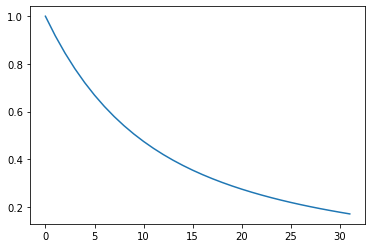

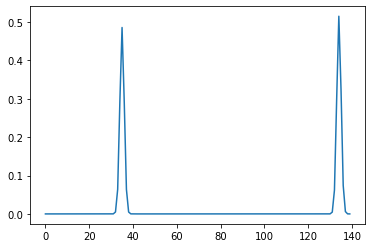

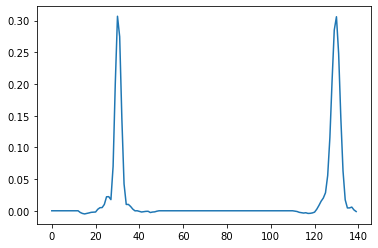

In [27]:
import torch
from module import set_module
import matplotlib.pyplot as plt

with torch.no_grad():
    checkpoint = torch.load('checkpoint/epoch_110.pth', map_location=torch.device('cuda'))
    args = checkpoint['args']
    module = set_module(args)
    module.load_state_dict(checkpoint['model'])
    module.cpu()
    module.eval()

sample = np.random.randint(1000)
test_input = np.reshape(train_input[sample], (1, 32))
test_input = torch.tensor(test_input)
test_input = test_input.to(torch.float32)


test_out = module(test_input)
test_out = test_out.cpu().detach().numpy()

plt.figure(1)
plt.plot(np.arange(len(train_input[sample])), train_input[sample])
plt.figure(2)
plt.plot(np.arange(len(train_label[sample])), train_label[sample])
plt.figure(3)
plt.plot(np.arange(len(test_out[0, :])), test_out[0, :])
    